In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline


This notebook runs linear regression and PCA using the same 2d data.

What happens if you

In [2]:
n1 = np.array([5,-4,8,-10,1,0])
n2 = np.array([7,-2,7,-9,0,-3])

A = np.concatenate((n1[np.newaxis,:], n2[np.newaxis,:]))

print('covariance matrix')
covA = A @ A.T / A.shape[1]
print('[[ %2.1f, %2.f ],\n [ %2.1f, %2.1f ]]'%(covA[0,0],covA[0,1],covA[1,0],covA[1,1]))

# find eigenvalues and eigenvectors of covariance matrix
lam, v = np.linalg.eig( covA )

print( 'eigenvalues: %2.1f, %2.1f'%(lam[0],lam[1]))
print( 'eigenvectors: [%2.2f,%2.2f], [%2.2f,%2.2f]'%(v[0,0],v[1,0],v[0,1],v[1,1]))

covariance matrix
[[ 34.3, 32 ],
 [ 31.5, 32.0 ]]
eigenvalues: 64.7, 1.6
eigenvectors: [0.72,0.69], [-0.69,0.72]


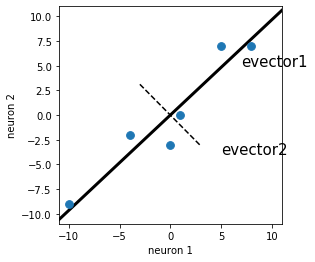

In [3]:
# plot neuron activity with eigenvectors
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( np.array([-3,3]), np.array([-3,3])*v[1,1]/v[0,1], '--', color='k', zorder=0 )
ax.text( 7,  5, 'evector1',fontsize=15)
ax.text( 5, -4, 'evector2',fontsize=15)
ax.set_xlabel('neuron 1')
ax.set_ylabel('neuron 2')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
plt.show()

Text(-10, 9, 'n2 = 0.92 * n1 + 0.00')

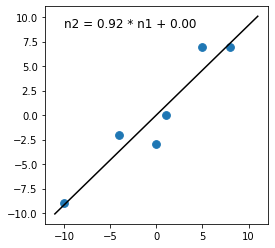

In [4]:
reg = LinearRegression().fit(n1.reshape(-1, 1), n2)
lr_xcoords = np.array([-11,11])
lr_ycoords = reg.coef_[0] * lr_xcoords + reg.intercept_

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( lr_xcoords, lr_ycoords, color='k' )
ax.text( -10, 9, 'n2 = %2.2f * n1 + %2.2f'%(reg.coef_[0], reg.intercept_),fontsize=12)